<a href="https://colab.research.google.com/github/asylum69/hambasahaya/blob/master/1301194115_Tubes1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Muhammad Noor Rifani Khadafi (1301194115)
### Tugas Besar I Pemodelan Simulasi



# Definisi Library

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 

# Fungsi

In [ ]:
# Fungsi Numerik
def posisiNum_vx(v,ax,dt):
    kecepatan_x = v + ax * dt
    return kecepatan_x 
def posisiNum_yx(v,ay,dt):
    kecepatan_y = v + ay * dt
    return kecepatan_y
def tinggi_num(y,v,dt):
    tinggi = y + v * dt
    return tinggi
def posisi_num(x,v,dt):
    position = x + v * dt
    return position

# Fungsi Analitik
def posisiAn_vx(v,ax,t):
    kecepatan_x = v + ax * t
    return kecepatan_x 
def posisiAn_yx(v,ay,t):
    kecepatan_y = v + ay * t
    return kecepatan_y
def tinggi_an(y,v,t,ay):
    tinggi = v*t + 0.5 * ay * pow(t,2)
    return tinggi
def posisi_an(x,v,t,ax):
    position = v*t - 0.5 * ax * pow(t,2)
    return position

# Funngsi kecepatan awal pada sumbu x,y
def awal_vx(v0,sudut):
    return v0 * np.cos(sudut)
def awal_yx(v0,sudut):
    return v0 * np.sin(sudut)

Input Data

In [ ]:
sudut = 35*(2*np.pi/360) 
m = float(input('Masukkan Massa : '))
v0 = float(input('Masukkan Kecepatan Awal : '))
dt = float(input('Masukkan Jarak Waktu : '))
D = float(input('Masukkan Hambatan Udara : '))

Masukkan Massa : 0.15
Masukkan Kecepatan Awal : 50
Masukkan Jarak Waktu : 0.01
Masukkan Hambatan Udara : 0.0013


# No 1

## Tanpa Hambatan

In [ ]:
# Menginisiasi posisi sumbu x,y,waktu
x_th = 0
y_th = 0 
t_th = 0 
position_th = [x_th] 
tinggi_th = [y_th] 
time_th = [t_th]

# Menginisiasi percepatan pada sumbu x,y (tanpa hambatan)
ax_th = 0
ay_th = -9.8


# Menginisiasi kecepatan awal pada sumbu x dan y
vx = awal_vx(v0, sudut) 
vy = awal_yx(v0, sudut)

# Menginisiasi untuk menentukan titik tertinggi max 
y_th_max = 0

# Melakukan perulangan untuk menentukan posisi sumbu x,y setiap waktu
while y_th >= 0:
    vx = posisiNum_vx(vx, ax_th, dt)
    vy = posisiNum_yx(vy, ay_th, dt)
    y_th = tinggi_num(y_th, vy, dt)
    x_th = posisi_num(x_th, vx, dt)
    t_th = t_th + dt

    if y_th < 0:
        break
    if y_th > y_th_max:
        y_th_max = y_th
    position_th.append(x_th)
    tinggi_th.append(y_th)
    time_th.append(t_th)

## Dengan Hambatan

In [ ]:
 # Menginisiasi posisi sumbu x,y,waktu
x_dh = 0
y_dh = 0 
t_dh = 0 
position_dh = [x_th] 
tinggi_dh = [y_th] 
time_dh = [t_th]

# Menginisiasi kecepatan awal pada sumbu x dan y
vx = awal_vx(v0, sudut)
vy = awal_yx(v0, sudut)

# Menginisiasi percepatan pada sumbu x,y (dengan hambatan)
v = np.sqrt(pow(vx, 2)+pow(vy, 2))
ax_dh = -((D/m)*v*vx)
ay_dh = -9.8 - ((D/m)*v*vy)

# Menginisiasi untuk menentukan titik tertinggi max 
y_max_dh = 0 

# Melakukan perulangan untuk menentukan posisi sumbu x,y setiap waktu 
while y_dh >= 0:
    v = np.sqrt(pow(vx, 2)+pow(vy, 2))
    ax_dh = -((D/m)*v*vx)
    ay_dh = -9.8 - ((D/m)*v*vy)
    vx = posisiNum_vx(vx, ax_dh, dt)
    vy = posisiNum_yx(vy, ay_dh, dt)
    y_dh = tinggi_num(y_dh, vy, dt)
    x_dh = posisi_num(x_dh, vx, dt)
    t_dh = t_dh + dt
    if  y_dh < 0:
        break
    if y_dh > y_max_dh:
        y_max_dh = y_dh
    position_dh.append(x_dh)
    tinggi_dh.append(y_dh)
    time_dh.append(t_dh)

## Visualisasi

Hasil Tanpa Hambatan
Tinggi =  41.81971970725295 meter
Posisi =  239.192396932388 meter
Total Waktu :  5.83999999999992 second


Hasil Dengan Hambatan
Tinggi =  25.460895364730693 meter
Posisi =  105.99620844536784 meter
Total Waktu :  4.509999999999948 second


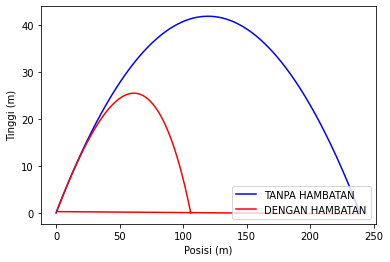

In [ ]:
# Visualisasi Tanpa Hambatan
print('Hasil Tanpa Hambatan')
print('Tinggi = ',y_th_max,'meter')
print('Posisi = ',position_th[-1],'meter')
#print ('Time = ', time_th)
print("Total Waktu : ",time_th[-1],'second')
plt.plot(position_th,tinggi_th,c='b', label ='Numerical tanpa Hambatan Udara')
plt.xlabel('Posisi (m)')
plt.ylabel('Tinggi (m)')

# Visualisasi Dengan Hambatan
print('\n')
print('Hasil Dengan Hambatan')
print('Tinggi = ',y_max_dh,'meter')
print('Posisi = ',position_dh[-1],'meter')
#print ('Time = ', time_dh)
print("Total Waktu : ",time_dh[-1],'second')
plt.plot(position_dh,tinggi_dh,c='r', label ='Numerical tanpa Hambatan Udara')
plt.xlabel('Posisi (m)')
plt.ylabel('Tinggi (m)')
plt.legend(['TANPA HAMBATAN','DENGAN HAMBATAN'],loc='best') 
plt.show()

# No 2